In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import PIL
import PIL.Image as img
import os
import pathlib

from tensorflow import keras
from tensorflow.keras import layers, Model, models

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [21]:
num_classes = 5

model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
],name='CNN 1 without Data Augmentation')

In [22]:
model.compile(optimizer='adam', 
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "CNN 1 without Data Augmentation"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None,

In [13]:
EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = EPOCHS
)

Epoch 1/10
92/92 [==============================] - 47s 503ms/step - loss: 1.3173 - accuracy: 0.4431 - val_loss: 1.1216 - val_accuracy: 0.5518
Epoch 2/10
92/92 [==============================] - 47s 508ms/step - loss: 1.0494 - accuracy: 0.5763 - val_loss: 0.9726 - val_accuracy: 0.6131
Epoch 3/10
92/92 [==============================] - 46s 504ms/step - loss: 0.9104 - accuracy: 0.6448 - val_loss: 0.9874 - val_accuracy: 0.6049
Epoch 4/10
92/92 [==============================] - 44s 474ms/step - loss: 0.8070 - accuracy: 0.6887 - val_loss: 0.8540 - val_accuracy: 0.6553
Epoch 5/10
92/92 [==============================] - 49s 534ms/step - loss: 0.6620 - accuracy: 0.7459 - val_loss: 0.8726 - val_accuracy: 0.6594
Epoch 6/10
92/92 [==============================] - 44s 482ms/step - loss: 0.5142 - accuracy: 0.8072 - val_loss: 0.9489 - val_accuracy: 0.6771
Epoch 7/10
92/92 [==============================] - 47s 507ms/step - loss: 0.3739 - accuracy: 0.8672 - val_loss: 1.2664 - val_accuracy: 0.6267

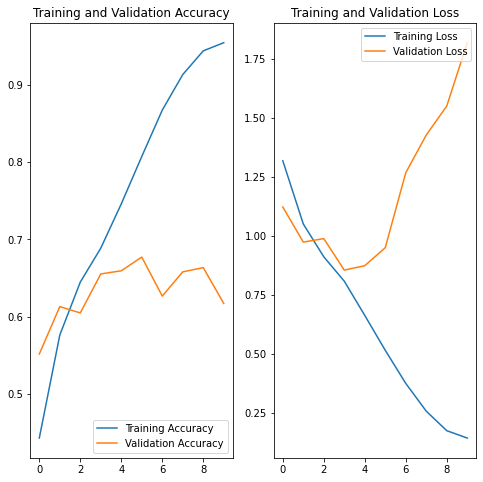

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()